In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

Data=pd.read_csv("WorldExpenditures.csv")

Data2015 = pd.read_csv("2015.csv")
Data2016 = pd.read_csv("2016.csv")
Data2017 = pd.read_csv("2017.csv")
Data2018 = pd.read_csv("2018.csv")
Data2019 = pd.read_csv("2019.csv")
Data2015["Year"] = 2015
Data2016["Year"] = 2016
Data2017["Year"] = 2017
Data2018["Year"] = 2018
Data2019["Year"] = 2019

Data2015 = Data2015.drop(["Standard Error"], axis=1)
Data2016 = Data2016.drop(["Lower Confidence Interval", "Upper Confidence Interval"], axis=1)
Data2017 = Data2017.drop(["Whisker.high", "Whisker.low"], axis=1)

Data2017 = Data2017.rename(columns={"Happiness.Rank": "Happiness Rank",
                                     "Happiness.Score": "Happiness Score",
                                     "Economy..GDP.per.Capita." : "Economy (GDP per Capita)",
                                     "Health..Life.Expectancy." : "Health (Life Expectancy)",
                                     "Trust..Government.Corruption." : "Trust (Government Corruption)",
                                     "Dystopia.Residual" : "Dystopia Residual"})
Data2018 = Data2018.rename(columns = {"Country or region" : "Country",
                                        "Overall rank" : "Happiness Rank",
                                        "Score" : "Happiness Score",
                                        "GDP per capita" : "Economy (GDP per Capita)",
                                        "Healthy life expectancy" : "Health (Life Expectancy)",
                                        "Freedom to make life choices" : "Freedom",
                                        "Perceptions of corruption" : "Trust (Government Corruption)",
                                        "Social support" : "Family"})
Data2019 = Data2019.rename(columns = {"Country or region" : "Country",
                                        "Overall rank" : "Happiness Rank",
                                        "Score" : "Happiness Score",
                                        "GDP per capita" : "Economy (GDP per Capita)",
                                        "Healthy life expectancy" : "Health (Life Expectancy)",
                                        "Freedom to make life choices" : "Freedom",
                                        "Perceptions of corruption" : "Trust (Government Corruption)",
                                        "Social support" : "Family"})
Happiness = pd.concat([Data2015,Data2016,Data2017,Data2018,Data2019], ignore_index = True)

In [3]:
# Isolating data within the desired date range (2015 - 2019)

Filter = (Data.Year >= 2015) & (Data.Year <= 2019)
DataCorrectYears = Data[Filter]
DataCorrectYears.Country
DataCorrectYears.Year
WorkingOrder = DataCorrectYears[DataCorrectYears.Sector == "Total function"]
WorkingOrder = WorkingOrder.drop(["GDP(%)"], axis=1)
WorkingOrder = DataCorrectYears.merge(WorkingOrder, how="outer",on=["Country","Year"])
DataCorrectYears.reset_index(drop = True)
DataCorrectYears = DataCorrectYears.rename(columns = {"Expenditure(million USD)" : "ExpenditureValue"})

In [4]:
Happiness = Happiness.sort_values(by = ["Country", "Year"])
Happiness.reset_index(drop = True, inplace = True)
Happiness.sort_values('Country', inplace = True)

In [5]:
DataCorrectYears.reset_index(drop = True, inplace = True)
DataCorrectYears = DataCorrectYears.iloc[:, 1:]
WorkingOrder = WorkingOrder.iloc[:]
WorkingOrder["PercentExpenditure"] = 100*WorkingOrder["Expenditure(million USD)_x"] / WorkingOrder["Expenditure(million USD)_y"]
WorkingOrder.head(50)

,Unnamed: 0_x,Year,Country,Sector_x,Expenditure(million USD)_x,GDP(%),Unnamed: 0_y,Sector_y,Expenditure(million USD)_y,PercentExpenditure
0,16516,2015,Afghanistan,Total function,11105.914,59.34850,16516,Total function,11105.914,100.000000
1,16517,2015,Afghanistan,Environment protection,18.360,0.09811,16516,Total function,11105.914,0.165317
2,16518,2015,Afghanistan,Housing and community amenities,57.828,0.30902,16516,Total function,11105.914,0.520696
3,16519,2015,Afghanistan,Health,302.201,1.61492,16516,Total function,11105.914,2.721082
4,16520,2015,Afghanistan,Education,809.055,4.32348,16516,Total function,11105.914,7.284902
5,16521,2015,Afghanistan,Social protection,292.672,1.56400,16516,Total function,11105.914,2.635281
6,16522,2015,Afghanistan,General public services,561.995,3.00322,16516,Total function,11105.914,5.060322
7,16523,2015,Afghanistan,Defence,5121.643,27.36937,16516,Total function,11105.914,46.116357
8,16524,2015,Afghanistan,Public order and safety,2546.912,13.61035,16516,Total function,11105.914,22.932935
9,16525,2015,Afghanistan,"Recreation, culture and religion",43.471,0.23231,16516,Total function,11105.914,0.391422


In [6]:
ExpendituresFlipped = WorkingOrder.pivot_table(index=['Country', 'Year'], 
                                                       columns='Sector_x', 
                                                       values='PercentExpenditure')
ExpendituresFlipped = ExpendituresFlipped.reset_index()
ExpendituresFlipped = ExpendituresFlipped.merge(Happiness)

BigBoyTable = ExpendituresFlipped
BigBoyTable.head(50).round()

,Country,Year,"Agriculture, forestry, fishing and hunting",Communication,Defence,Economic affairs n.e.c.,Education,Environment protection,Fuel and energy,"General economic, commercial and labour affairs",...,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,2015,NaN,NaN,46.0,NaN,7.0,0.0,NaN,NaN,...,Southern Asia,153,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,Afghanistan,2016,3.0,0.0,37.0,0.0,8.0,0.0,3.0,2.0,...,Southern Asia,154,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,Afghanistan,2017,3.0,1.0,36.0,0.0,8.0,0.0,4.0,5.0,...,NaN,141,4.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,Albania,2015,2.0,0.0,2.0,1.0,10.0,0.0,2.0,0.0,...,Central and Eastern Europe,95,5.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
4,Albania,2016,3.0,0.0,2.0,0.0,11.0,1.0,0.0,0.0,...,Central and Eastern Europe,109,5.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
5,Albania,2017,2.0,0.0,2.0,0.0,11.0,1.0,1.0,0.0,...,NaN,109,5.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
6,Albania,2018,2.0,0.0,2.0,0.0,11.0,0.0,0.0,0.0,...,NaN,112,5.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN
7,Albania,2019,2.0,0.0,3.0,0.0,11.0,1.0,0.0,0.0,...,NaN,107,5.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN
8,Armenia,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Central and Eastern Europe,127,4.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
9,Armenia,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Central and Eastern Europe,121,4.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0


In [8]:
CorrelationTable = BigBoyTable.corr().round(2)
CorrelationValues = CorrelationTable["Happiness Score"]

/tmp/ipykernel_186/2663393223.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CorrelationTable = BigBoyTable.corr().round(2)


In [9]:
BigBoyTable.columns[2:19]

Index(['Agriculture, forestry, fishing and hunting', 'Communication',
       'Defence', 'Economic affairs n.e.c.', 'Education',
       'Environment protection', 'Fuel and energy',
       'General economic, commercial and labour affairs',
       'General public services', 'Health', 'Housing and community amenities',
       'Mining, manufacturing and construction', 'Other industries', 'Others',
       'Public order and safety', 'RandD Economic affairs',
       'Recreation, culture and religion'],
      dtype='object')

In [10]:
LittleBoyTable = BigBoyTable.fillna(0)
LittleBoyTable

,Country,Year,"Agriculture, forestry, fishing and hunting",Communication,Defence,Economic affairs n.e.c.,Education,Environment protection,Fuel and energy,"General economic, commercial and labour affairs",...,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,2015,0.000000,0.000000,46.116357,0.000000,7.284902,0.165317,0.000000,0.000000,...,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100
1,Afghanistan,2016,3.353553,0.420256,37.303535,0.000000,8.260237,0.269844,2.506234,2.005916,...,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580
2,Afghanistan,2017,3.171050,0.544863,36.314832,0.000000,8.202481,0.384322,3.595161,4.558923,...,0,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801
3,Albania,2015,1.953985,0.000000,2.419894,1.207962,10.441039,0.325422,1.750233,0.255312,...,Central and Eastern Europe,95,4.959,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940
4,Albania,2016,2.948416,0.000000,2.429801,0.021766,10.829813,0.641332,0.113614,0.257250,...,Central and Eastern Europe,109,4.655,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,1.928160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Uzbekistan,2015,0.000000,0.000000,0.000000,0.000000,28.668359,0.062357,0.000000,0.000000,...,Central and Eastern Europe,44,6.003,0.632440,1.340430,0.597720,0.658210,0.308260,0.228370,2.237410
318,Uzbekistan,2016,0.000000,0.000000,0.000000,0.000000,29.180079,0.059133,0.000000,0.000000,...,Central and Eastern Europe,49,5.987,0.735910,1.168100,0.501630,0.608480,0.283330,0.343260,2.346380
319,Uzbekistan,2017,0.000000,0.000000,0.000000,0.000000,27.687770,0.177405,0.000000,0.000000,...,0,47,5.971,0.786441,1.548969,0.498273,0.658249,0.246528,0.415984,1.816914
320,Uzbekistan,2018,0.000000,0.000000,0.000000,0.000000,26.634999,0.258013,0.000000,0.000000,...,0,44,6.096,0.719000,1.584000,0.605000,0.724000,0.259000,0.328000,0.000000


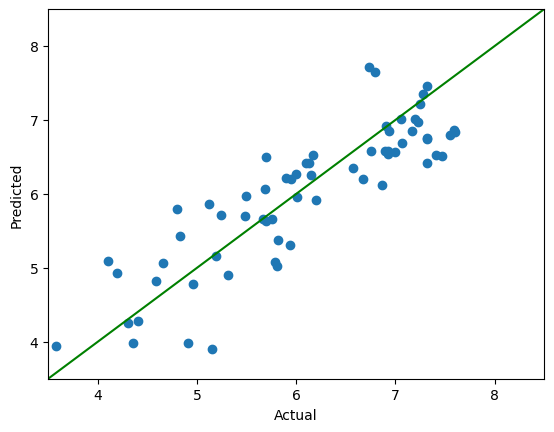

             Actual  Predicted
Actual     1.000000   0.863476
Predicted  0.863476   1.000000


In [11]:
# ------------------------------------------------------------------------------------------
PREDICTOR = 'Happiness Score'
COLUMNS = slice(2, 22)
# ------------------------------------------------------------------------------------------

train, test = train_test_split(LittleBoyTable, train_size = 0.80)


Y = train[PREDICTOR]
X = train.iloc[:, COLUMNS]
modelScore = sm.OLS(Y, X).fit()

predictedVals = modelScore.predict(test.iloc[:, COLUMNS])

plt.scatter(test[PREDICTOR], predictedVals)
plt.xlim(3.5, 8.5)
plt.ylim(3.5, 8.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([1,9], [1,9], color = "green")
plt.show()

Results = pd.DataFrame({"Actual" : test[PREDICTOR], "Predicted" : predictedVals})
print(Results[["Actual", "Predicted"]].corr())

Mean Squared Error: 0.3884209698150235
R-squared: 0.4944905237109123


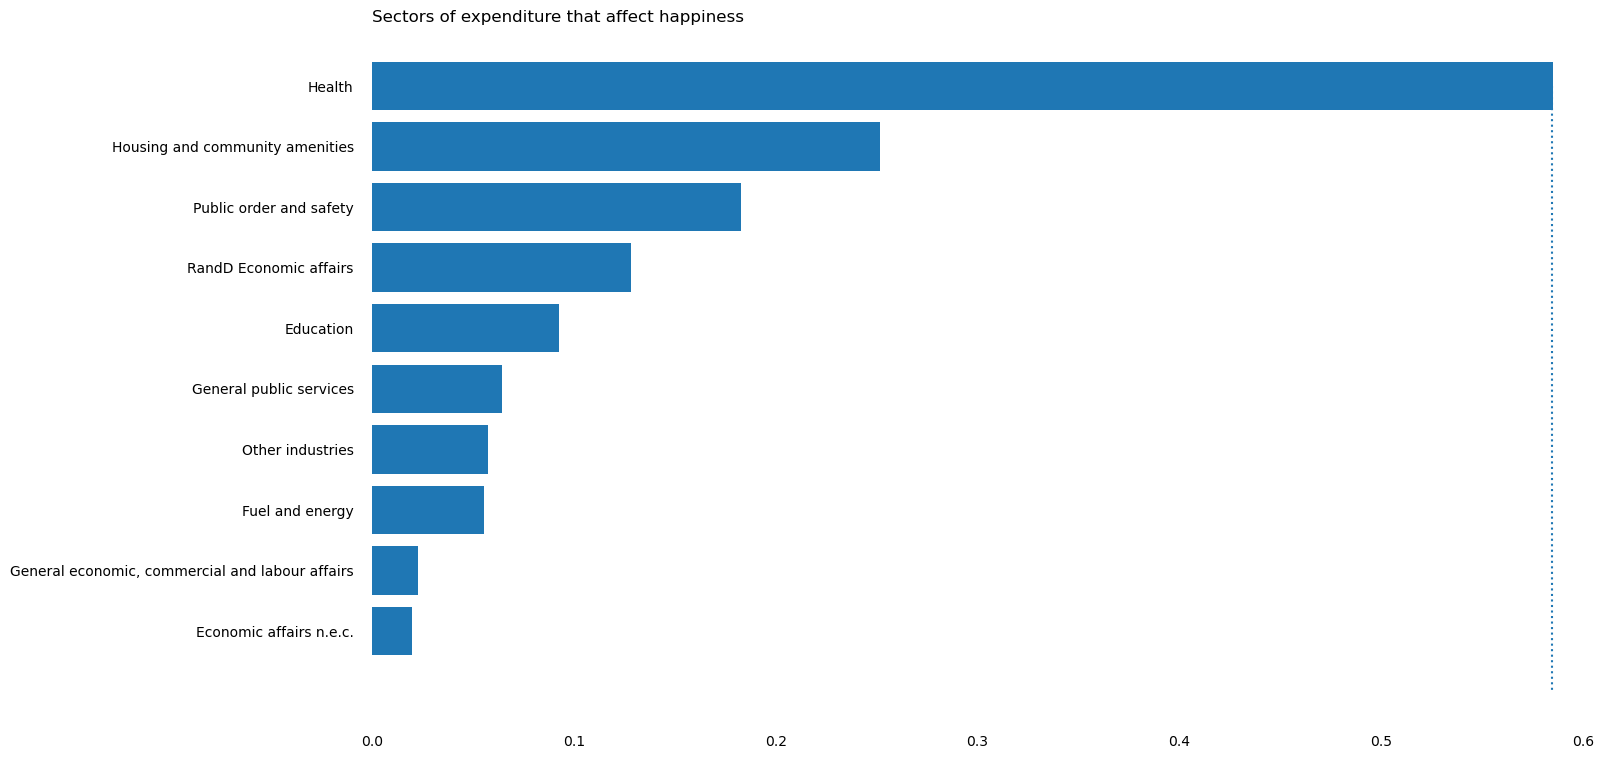

In [12]:
# Assuming 'data' is your DataFrame and 'target' is your target variable
X = LittleBoyTable.drop(columns=["Happiness Score", "Country", "Region", "Happiness Rank", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"])
y = LittleBoyTable["Happiness Score"]

# Optional: Standardize your features
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaled = scaler.fit_transform(X_train)
lasso = Lasso(alpha=0.02811768697974228)
lasso.fit(X_scaled, y_train)
X_test_scaled = scaler.fit_transform(X_test)
y_pred = lasso.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Get coefficients and feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

coefficients["Coefficient"] = coefficients.Coefficient.abs()
coefficients = coefficients.sort_values(by = "Coefficient", ascending=False)

coefficients = coefficients[0:10]

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(coefficients.Feature, coefficients.Coefficient)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Sectors of expenditure that affect happiness',
             loc ='left', )
plt.vlines(0.585,0,10, linestyle = "dotted")

# Show Plot
plt.show()

In [13]:
LittleBoyTable

,Country,Year,"Agriculture, forestry, fishing and hunting",Communication,Defence,Economic affairs n.e.c.,Education,Environment protection,Fuel and energy,"General economic, commercial and labour affairs",...,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,2015,0.000000,0.000000,46.116357,0.000000,7.284902,0.165317,0.000000,0.000000,...,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100
1,Afghanistan,2016,3.353553,0.420256,37.303535,0.000000,8.260237,0.269844,2.506234,2.005916,...,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580
2,Afghanistan,2017,3.171050,0.544863,36.314832,0.000000,8.202481,0.384322,3.595161,4.558923,...,0,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801
3,Albania,2015,1.953985,0.000000,2.419894,1.207962,10.441039,0.325422,1.750233,0.255312,...,Central and Eastern Europe,95,4.959,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940
4,Albania,2016,2.948416,0.000000,2.429801,0.021766,10.829813,0.641332,0.113614,0.257250,...,Central and Eastern Europe,109,4.655,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,1.928160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Uzbekistan,2015,0.000000,0.000000,0.000000,0.000000,28.668359,0.062357,0.000000,0.000000,...,Central and Eastern Europe,44,6.003,0.632440,1.340430,0.597720,0.658210,0.308260,0.228370,2.237410
318,Uzbekistan,2016,0.000000,0.000000,0.000000,0.000000,29.180079,0.059133,0.000000,0.000000,...,Central and Eastern Europe,49,5.987,0.735910,1.168100,0.501630,0.608480,0.283330,0.343260,2.346380
319,Uzbekistan,2017,0.000000,0.000000,0.000000,0.000000,27.687770,0.177405,0.000000,0.000000,...,0,47,5.971,0.786441,1.548969,0.498273,0.658249,0.246528,0.415984,1.816914
320,Uzbekistan,2018,0.000000,0.000000,0.000000,0.000000,26.634999,0.258013,0.000000,0.000000,...,0,44,6.096,0.719000,1.584000,0.605000,0.724000,0.259000,0.328000,0.000000


In [14]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 50), cv=5)
lasso_cv.fit(X_train, y_train)
print(f"Optimal alpha: {lasso_cv.alpha_}")

Optimal alpha: 0.02811768697974228


In [15]:
updatedCoeffs = coefficients.sort_values(by = "Coefficient")
updatedCoeffs = updatedCoeffs[0:3]
newTable = LittleBoyTable.drop(columns = ["Year", "Others", "Total function", "Agriculture, forestry, fishing and hunting", "Communication", "Defence", "Environment protection", "Mining, manufacturing and construction", "Recreation, culture and religion", "Social protection", "Transport", "Region", "Happiness Rank", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"])

In [16]:
newTable.sort_values(by = "Health", ascending = False).head(50).loc[newTable.Country == "Paraguay"].round()

,Country,Economic affairs n.e.c.,Education,Fuel and energy,"General economic, commercial and labour affairs",General public services,Health,Housing and community amenities,Other industries,Public order and safety,RandD Economic affairs,Happiness Score
235,Paraguay,0.0,17.0,0.0,1.0,8.0,17.0,2.0,0.0,13.0,0.0,6.0


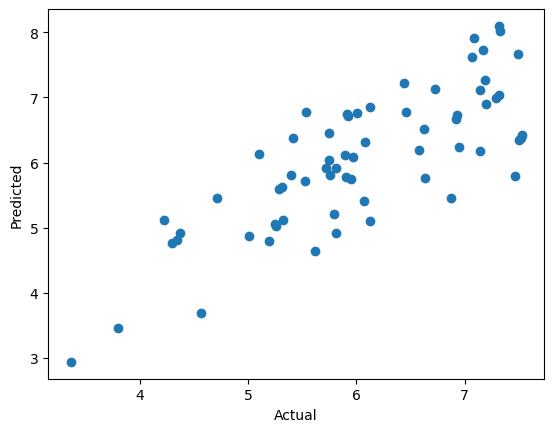

Education                                          0.10
Fuel and energy                                    0.05
General economic, commercial and labour affairs    0.11
General public services                            0.07
Health                                             0.25
Housing and community amenities                   -0.05
Other industries                                   0.03
Public order and safety                            0.02
RandD Economic affairs                             0.37
dtype: float64

In [17]:
# ------------------------------------------------------------------------------------------
PREDICTOR = 'Happiness Score'
COLUMNS = slice(2, 11)
# ------------------------------------------------------------------------------------------

train, test = train_test_split(newTable, train_size = 0.80)


Y = train[PREDICTOR]
X = train.iloc[:, COLUMNS]
modelScore = sm.OLS(Y, X).fit()

predictedVals = modelScore.predict(test.iloc[:, COLUMNS])

plt.scatter(test[PREDICTOR], predictedVals)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

from sklearn.metrics import accuracy_score

Results = pd.DataFrame({"Actual" : test[PREDICTOR], "Predicted" : predictedVals})
modelScore.params.round(2)

In [18]:
corrTable = newTable.corr()

happinessCorrRow = corrTable[corrTable.index == 'Happiness Score']

#happinessCorrRow = happinessCorrRow.rename(columns = ["Economic affairs n.e.c" : "Econ n.e.c", "Education", "Fuel and energy", "General", "Health", "Housing", "Other", "Public safety", "RandD Econ"])
# fig = plt.figure(figsize = (10, 5))

# plt.bar(happinessCorrRow.columns, happinessCorrRow[happinessCorrRow <= 0], color ='red', width = 0.4)
# plt.bar(happinessCorrRow.columns, happinessCorrRow[happinessCorrRow > 0], color ='green', width = 0.4)
# plt.xlabel("Sector")
# plt.ylabel("Score")
# plt.title("Correlation of sector to score")
# plt.show()

/tmp/ipykernel_186/2961403585.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrTable = newTable.corr()


In [19]:
happinessCorrRow

,Economic affairs n.e.c.,Education,Fuel and energy,"General economic, commercial and labour affairs",General public services,Health,Housing and community amenities,Other industries,Public order and safety,RandD Economic affairs,Happiness Score
Happiness Score,-0.11874,0.1641,-0.22946,0.12477,-0.169849,0.719669,-0.407747,-0.124737,-0.338971,0.268364,1.0


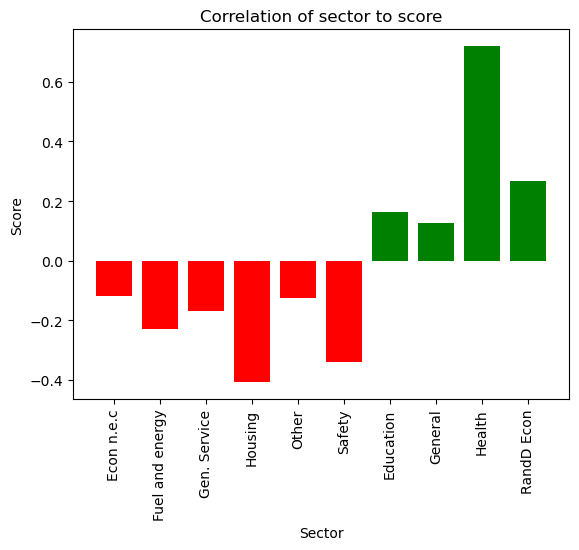

In [20]:
less = happinessCorrRow[happinessCorrRow < 0]
greater = happinessCorrRow[happinessCorrRow >= 0]
less = less.drop(columns = ["Education", "General economic, commercial and labour affairs", "Health", "RandD Economic affairs", "Happiness Score"])
greater = greater.drop(columns = ["Economic affairs n.e.c.", "Fuel and energy", "General public services", "Housing and community amenities", "Other industries", "Public order and safety"])
#less.rename(columns={'Economic affairs n.e.c.': 'Econ n.e.c', 'General public services': 'General', 'Housing and community amenities' : 'Housing', 'Other industries' : 'Other', 'Public order and safety' : 'Public safety', 'General economic, commercial and labour affairs' : 'General affairs', 'RandD Economic affairs' : 'RandD Econ'}, inplace=True)
less.rename(columns = {"Economic affairs n.e.c." : "Econ n.e.c", "General public services" : "Gen. Service", "Housing and community amenities" : "Housing", "Other industries" : "Other", "Public order and safety" : "Safety"}, inplace = True)
greater.rename(columns = {"General economic, commercial and labour affairs" : "General", "RandD Economic affairs" : "RandD Econ"}, inplace = True)
greater.drop(columns = ["Happiness Score"], inplace = True)
lessSeries = pd.Series(less.columns)
lessSeries

greaterSeries = pd.Series(greater.columns)
greaterSeries, lessSeries

combinedSeries = pd.concat([lessSeries, greaterSeries])
combinedSeries
plt.bar(less.columns, less.iloc[0], color ='red')
plt.bar(greater.columns, greater.iloc[0], color ='green')
plt.xticks(combinedSeries, rotation = 90)
plt.xlabel("Sector")
plt.ylabel("Score")
plt.title("Correlation of sector to score")
plt.show()

In [21]:
lessSeries = pd.Series(less.columns)
lessSeries

greaterSeries = pd.Series(greater.columns)
greaterSeries, lessSeries

combinedSeries = pd.concat([lessSeries, greaterSeries], ignore_index = True)
combinedSeries

0         Econ n.e.c
1    Fuel and energy
2       Gen. Service
3            Housing
4              Other
5             Safety
6          Education
7            General
8             Health
9         RandD Econ
dtype: object